# Main project 3

# Train a CNN to recognize handwritten digits (0-9) from images

<b> 1.Load the Required libraries</b>

In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

<b> 2.Load the dataset</b>

In [7]:
# Load the dataset

train_data = pd.read_csv(r"C:\Users\santhosh\Downloads\emnist-digits-train.csv\emnist-digits-train.csv")
test_data = pd.read_csv(r"C:\Users\santhosh\Downloads\emnist-digits-test.csv\emnist-digits-test.csv")


We loaded the EMNIST dataset and selected the "digits" subset for our task.

<b> 3.Data clean </b>

In [8]:
#to find null values for train data

train_data.isnull().sum()

8        0
0        0
0.1      0
0.2      0
0.3      0
        ..
0.516    0
0.517    0
0.518    0
0.519    0
0.520    0
Length: 785, dtype: int64

In [9]:
# to find duplicate values for test data

train_data.duplicated().sum()

0

In [10]:
# to find null for test data

test_data.isnull().sum()

0        0
0.1      0
0.2      0
0.3      0
0.4      0
        ..
0.477    0
0.478    0
0.479    0
0.480    0
0.481    0
Length: 785, dtype: int64

In [11]:
# to find duplicate for test data

test_data.duplicated().sum()

0

In [12]:
# Split features and labels

X_train = train_data.iloc[:, 1:].values
y_train = train_data.iloc[:, 0].values
X_test = test_data.iloc[:, 1:].values
y_test = test_data.iloc[:, 0].values


<b>4.Normalization</b>

In [13]:
# Normalize pixel values
# We normalized the pixel values to be between 0 and 1.

X_train = X_train / 255.0
X_test = X_test / 255.0

<b> 5.split the dataset </b>

In [14]:
# Reshape the dataset to fit the model

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

<b> 6.convert the data </b>

In [15]:
# Convert labels to one-hot encoding
# for the purpopse of multiclass classification.

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

<b>7.Build the CNN Model</b>

In [16]:
# apply the activation functions

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

C:\Users\santhosh\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


We built a simple CNN architecture using layers like Conv2D, MaxPooling2D, Flatten, and Dense.

In [17]:
# applying Optimizers

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


<b> 8.Train the model </b>

In [5]:
# training the model for the evaluation.
# epochs = batches , batch size = set of values

history = model.fit(X_train, y_train, epochs=20, batch_size=500, validation_split=0.2)

Epoch 1/20
384/384 ━━━━━━━━━━━━━━━━━━━━ 54s 130ms/step - accuracy: 0.8426 - loss: 0.5156 - val_accuracy: 0.9868 - val_loss: 0.0433
Epoch 2/20
384/384 ━━━━━━━━━━━━━━━━━━━━ 46s 120ms/step - accuracy: 0.9817 - loss: 0.0629 - val_accuracy: 0.9901 - val_loss: 0.0328
Epoch 3/20
384/384 ━━━━━━━━━━━━━━━━━━━━ 51s 133ms/step - accuracy: 0.9861 - loss: 0.0487 - val_accuracy: 0.9919 - val_loss: 0.0277
Epoch 4/20
384/384 ━━━━━━━━━━━━━━━━━━━━ 66s 172ms/step - accuracy: 0.9885 - loss: 0.0398 - val_accuracy: 0.9927 - val_loss: 0.0255
Epoch 5/20
384/384 ━━━━━━━━━━━━━━━━━━━━ 49s 128ms/step - accuracy: 0.9901 - loss: 0.0347 - val_accuracy: 0.9926 - val_loss: 0.0250
Epoch 6/20
384/384 ━━━━━━━━━━━━━━━━━━━━ 50s 129ms/step - accuracy: 0.9910 - loss: 0.0312 - val_accuracy: 0.9936 - val_loss: 0.0226
Epoch 7/20
384/384 ━━━━━━━━━━━━━━━━━━━━ 51s 133ms/step - accuracy: 0.9923 - loss: 0.0273 - val_accuracy: 0.9939 - val_loss: 0.0219
Epoch 8/20
384/384 ━━━━━━━━━━━━━━━━━━━━ 47s 123ms/step - accuracy: 0.9924 - loss: 0

<b> 9.Model Evaluation </b>

In [7]:
# evaluting the model test loss and test accuracy.

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy}')

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9958 - loss: 0.0181
Test accuracy: 0.9961498975753784


<b> 10.Experiment with different architecture </b>

In [8]:
# evaluating with different architure with extented optimizaton algorithm

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# using with keras adam optimizer

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


# training the model

history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2)


Epoch 1/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 92s 29ms/step - accuracy: 0.8741 - loss: 0.3835 - val_accuracy: 0.9828 - val_loss: 0.0635
Epoch 2/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 78s 26ms/step - accuracy: 0.9847 - loss: 0.0597 - val_accuracy: 0.9877 - val_loss: 0.0455
Epoch 3/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - accuracy: 0.9879 - loss: 0.0466 - val_accuracy: 0.9887 - val_loss: 0.0401
Epoch 4/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 84s 28ms/step - accuracy: 0.9901 - loss: 0.0372 - val_accuracy: 0.9896 - val_loss: 0.0400
Epoch 5/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 91s 30ms/step - accuracy: 0.9919 - loss: 0.0317 - val_accuracy: 0.9899 - val_loss: 0.0391
Epoch 6/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 76s 25ms/step - accuracy: 0.9927 - loss: 0.0272 - val_accuracy: 0.9915 - val_loss: 0.0381
Epoch 7/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 87s 29ms/step - accuracy: 0.9930 - loss: 0.0263 - val_accuracy: 0.9919 - val_loss: 0.0372
Epoch 8/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 79s 26ms/step - accuracy: 0.9942 -

Model Architecture: 
* Added an extra convolutional layer (Conv2D(128)) to increase model complexity.
* Dropout Layers: Increased the number of neurons in the dense layers and added more dropout layers to prevent overfitting.
* Learning Rate: Adjusted the learning rate to 0.0001 for the Adam optimizer to see if a smaller learning rate improves performance.
* Training Epochs: Increased the number of training epochs to 20 and reduced batch size to 64 for potentially better training results.

In [14]:
import matplotlib.pyplot as plt

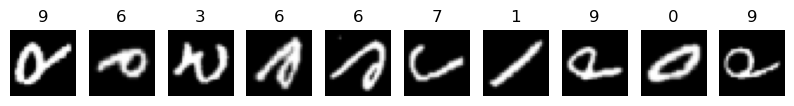

In [15]:
# plot some samples from the dataset

def plot_samples(X, y, n_samples=10):
    plt.figure(figsize=(10, 1))
    for i in range(n_samples):
        plt.subplot(1, n_samples, i + 1)
        plt.imshow(X[i].reshape(28, 28), cmap='gray')
        plt.title(np.argmax(y[i]))
        plt.axis('off')
    plt.show()

# Plot samples from the training set
plot_samples(X_train, y_train)


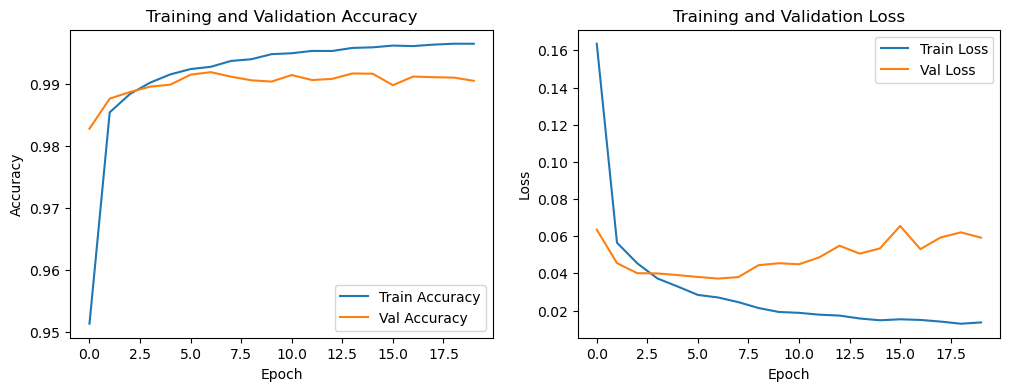

In [16]:
# Plot Training and Validation Accuracy


def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')

    plt.show()

# Plot training history
plot_training_history(history)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


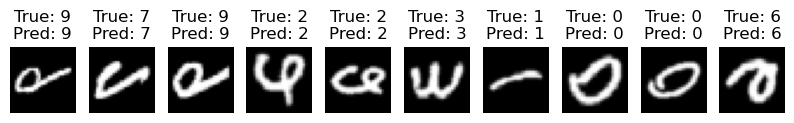

In [17]:
# Plot Model Predictions

def plot_predictions(X, y_true, y_pred, n_samples=10):
    plt.figure(figsize=(10, 1))
    for i in range(n_samples):
        plt.subplot(1, n_samples, i + 1)
        plt.imshow(X[i].reshape(28, 28), cmap='gray')
        plt.title(f'True: {np.argmax(y_true[i])}\nPred: {np.argmax(y_pred[i])}')
        plt.axis('off')
    plt.show()

# Predict using the model
y_pred = model.predict(X_test[:10])

# Plot predictions
plot_predictions(X_test, y_test, y_pred)


<b>This project demonstrates the effectiveness of CNNs for image classification tasks and provides a solid foundation for further exploration and improvement of deep learning models for handwritten digit recognition.</b>